In [1]:
import pandas as pd
import matplotlib.pyplot as plt

exp_csv_path = "expenses.csv"
pri_csv_path = "prices.csv"

list_df_exp = {}
list_df_pri ={}
list_ter_name = ["Canada", "Atlantic Region","Newfoundland and Labrador", "Prince Edward Island",
                 "Nova Scotia", "New Brunswick","Quebec", "Ontario","Prairie Region", "Manitoba","Saskatchewan",
                 "Alberta","British Columbia"]
plt.close("all")

pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)


df_exp = pd.read_csv(exp_csv_path)
df_pri = pd.read_csv(pri_csv_path)

# print(df_exp[["REF_DATE","GEO", "Food expenditures, summary-level categories", "VALUE"]])
# print("---")
# print(df_pri[["REF_DATE","GEO", "Products", "VALUE"]])

In [2]:
def create_list_expense(geo_name):
    list = {}
    pre_year = 2010
    
    #2010-2019
    for i in range(10):
        
        year = pre_year + i 
        list[geo_name+"_"+str(year)] = df_exp.loc[ (df_exp["REF_DATE"]== year) & (df_exp["GEO"]== geo_name) ]
        
    return list

In [3]:
def create_list_pri():
    
    list={}
    
    with open("products.txt", "r") as products:
        
        pre_year = 1995
        
        for product in products:
            name = product.replace("\n","")
            #year difference 1995 et 2021
            for i in range(26):
                year = pre_year + i 
                list[name+"_"+str(year)] = df_pri.loc[(df_pri["Products"] == name) & df_pri["REF_DATE"].str.contains(str(year))]
            
    
    return list
    
    

In [4]:
list_df_pri = create_list_pri()

In [5]:
for name in list_ter_name:
    
    list_df_exp[name] = create_list_expense(name)

In [6]:
list_df_pri["Round steak, 1 kilogram_1995"]

,REF_DATE,GEO,DGUID,Products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1995-01,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,10.17,NaN,NaN,NaN,2
59,1995-02,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,10.29,NaN,NaN,NaN,2
118,1995-03,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,10.12,NaN,NaN,NaN,2
177,1995-04,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,10.38,NaN,NaN,NaN,2
236,1995-05,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,10.00,NaN,NaN,NaN,2
295,1995-06,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,10.19,NaN,NaN,NaN,2
354,1995-07,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,10.26,NaN,NaN,NaN,2
413,1995-08,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,10.07,NaN,NaN,NaN,2
472,1995-09,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,10.08,NaN,NaN,NaN,2
531,1995-10,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,9.92,NaN,NaN,NaN,2


In [23]:
list_df_exp["Canada"]["Canada_2010"]

,REF_DATE,GEO,DGUID,Statistic,"Food expenditures, summary-level categories",UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2010,Canada,2016A000011124,Average expenditure per household,Food expenditures,Dollars,81,units,0,v54531258,1.1.1,7850.0,NaN,NaN,NaN,0
1,2010,Canada,2016A000011124,Average expenditure per household,Food purchased from stores,Dollars,81,units,0,v54531259,1.1.2,5709.0,NaN,NaN,NaN,0
2,2010,Canada,2016A000011124,Average expenditure per household,Bakery products,Dollars,81,units,0,v54531260,1.1.3,581.0,NaN,NaN,NaN,0
3,2010,Canada,2016A000011124,Average expenditure per household,Bread and unsweetened rolls and buns,Dollars,81,units,0,v54531261,1.1.4,273.0,NaN,NaN,NaN,0
4,2010,Canada,2016A000011124,Average expenditure per household,Bread,Dollars,81,units,0,v64481413,1.1.180,207.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2010,Canada,2016A000011124,Average expenditure per household,Restaurant meals,Dollars,81,units,0,v54531435,1.1.178,1885.0,NaN,NaN,NaN,0
252,2010,Canada,2016A000011124,Average expenditure per household,Restaurant dinners,Dollars,81,units,0,v64481492,1.1.259,1099.0,NaN,NaN,NaN,0
253,2010,Canada,2016A000011124,Average expenditure per household,Restaurant lunches,Dollars,81,units,0,v64481493,1.1.260,633.0,NaN,NaN,NaN,0
254,2010,Canada,2016A000011124,Average expenditure per household,Restaurant breakfasts,Dollars,81,units,0,v64481494,1.1.261,154.0,NaN,NaN,NaN,0


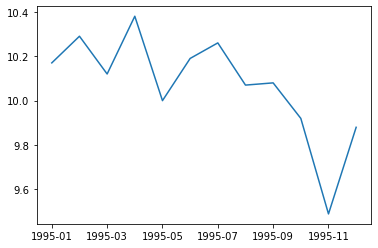

In [8]:
ts = pd.Series(list_df_pri["Round steak, 1 kilogram_1995"]["VALUE"].tolist(),
               index=list_df_pri["Round steak, 1 kilogram_1995"]["REF_DATE"].tolist())
ts.plot();

In [48]:
def createListValueofChicken(year):
    tmp_list=[] 
    for element in list_df_pri["Chicken, 1 kilogram_"+year]["VALUE"]:
        tmp_list.append(element)
    
    return tmp_list

def createListChicken():
    year = 1995
    liste ={}
    for i in range(26):
        liste[str(year)] = createListValueofChicken(str(year))
        year+=1
    
    return liste

list_Chicken = createListChicken()

<AxesSubplot:xlabel='month'>

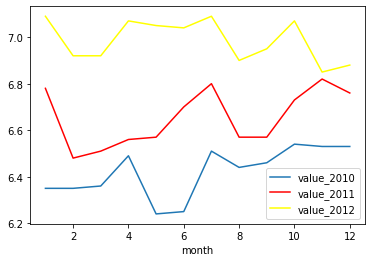

In [50]:
df = pd.DataFrame({
    'month':[1,2,3,4,5,6,7,8,9,10,11,12],
    'value_2010':list_Chicken["2010"],
    'value_2011':list_Chicken["2011"],
    'value_2012':list_Chicken["2012"]
})
#How to add extrat column
# df['expense'] = list_df_pri["Chicken, 1 kilogram_2010"]

ax = plt.gca()
df.plot(kind='line',x='month',y='value_2010',ax=ax)
df.plot(kind='line',x='month',y='value_2011', color='red', ax=ax)
df.plot(kind='line',x='month',y='value_2012', color='yellow', ax=ax)